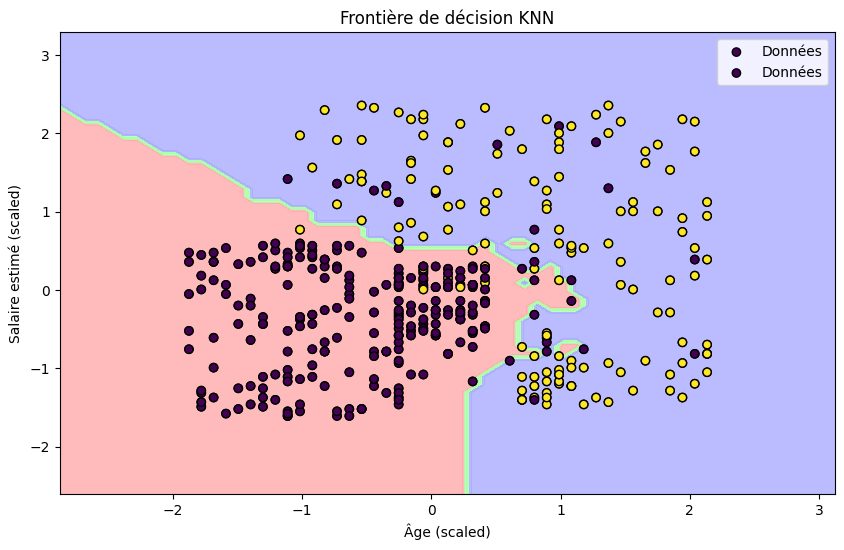

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Charger les données à partir du fichier CSV
data = pd.read_csv('Social_Network_Ads.csv')

# Sélectionner les caractéristiques (X) et les étiquettes de classe (y)
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Normaliser les caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialiser le classificateur KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entraîner le classificateur
knn.fit(X_train, y_train)

# Plot decision boundary
h = 0.1  # Step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot data points
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', label='Données')

# Légende
plt.legend(loc='upper right')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Frontière de décision KNN")
plt.xlabel("Âge (scaled)")
plt.ylabel("Salaire estimé (scaled)")
plt.show()
